<a href="https://colab.research.google.com/github/segu2003/Segu/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import Modules***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

***Loading the Dataset***

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/seven code project/Titanic-Dataset.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Datatype Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#statistical Information
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Exploratory Data Analysis***

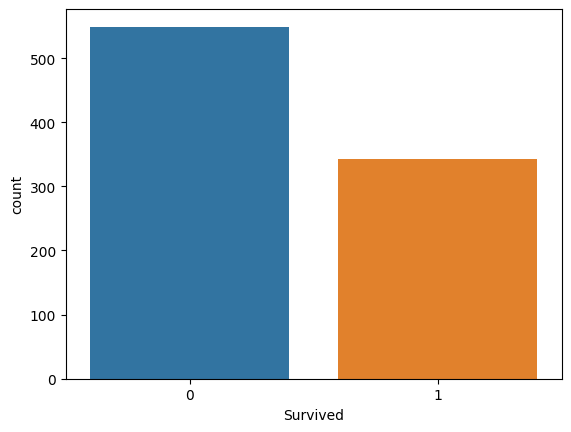

In [ ]:
#categorical attribute
sns.countplot(x='Survived',data=data)
plt.show()

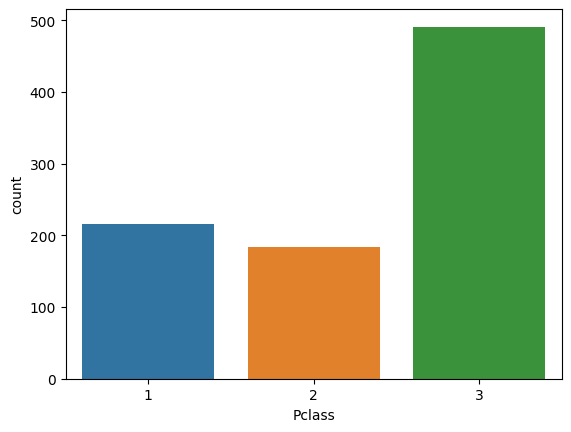

In [ ]:
sns.countplot(x='Pclass',data=data)
plt.show()

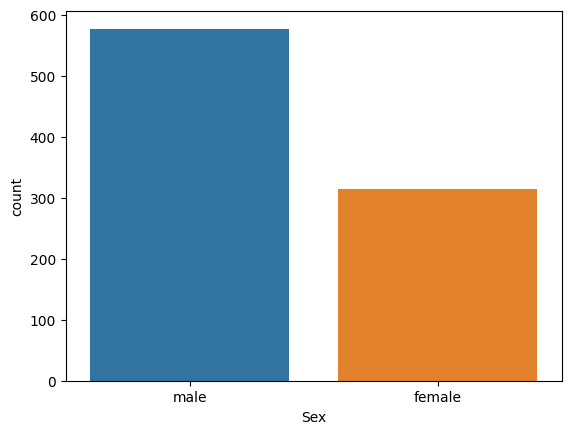

In [ ]:
sns.countplot(x='Sex',data=data)
plt.show()

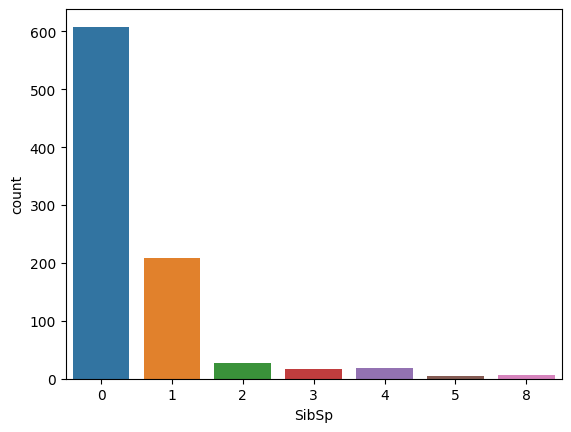

In [ ]:
sns.countplot(x='SibSp',data=data)
plt.show()

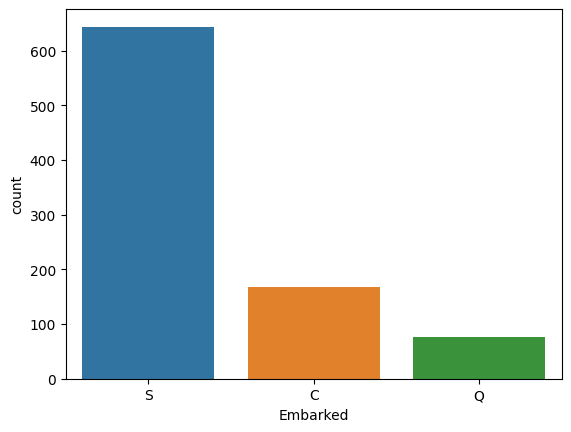

In [ ]:
sns.countplot(x='Embarked',data=data)
plt.show()

In [ ]:
#drop or delete the column
data=data.drop(columns=['Cabin'], axis=1)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
#Filling missing values using mean of that column
data['Age']=data['Age'].fillna(data['Age'].mean())

In [ ]:
data['Embarked'].mode()[0]

'S'

In [ ]:
#filling missing values using mode of the categorical column
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

***Loading transformation for uniform data distribution***

<Axes: xlabel='Fare', ylabel='Density'>

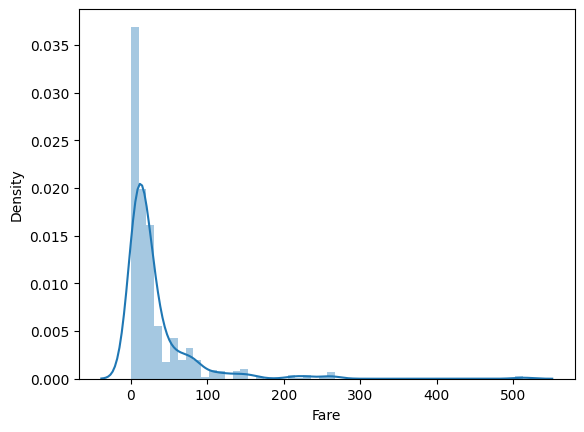

In [ ]:
sns.distplot(data['Fare'])

In [ ]:
data['Fare']=np.log(data['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

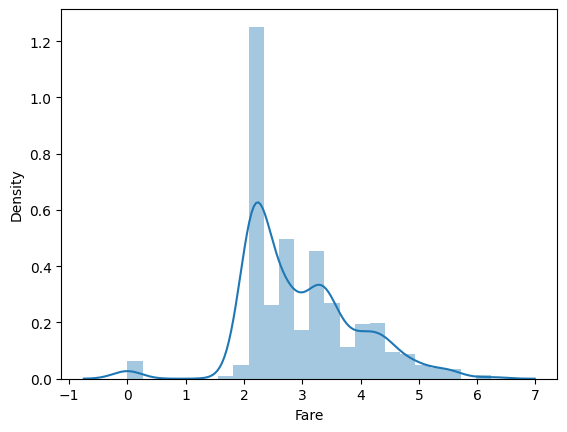

In [ ]:
sns.distplot(data['Fare'])

***Correlation matrix***

A correlation matrix in machine learning is a table that displays the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. Correlation is a statistical measure that indicates the extent to which two variables change together. It helps you understand the relationships between different features or variables in your dataset.


<Axes: >

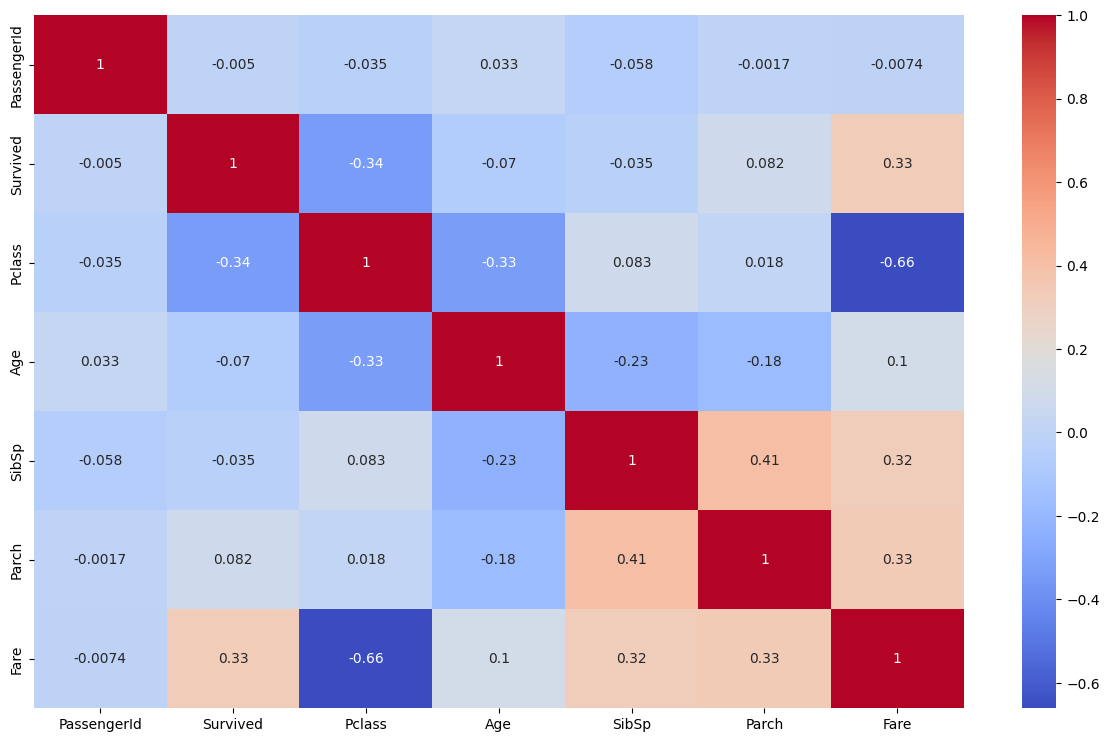

In [ ]:
corr =data.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True, cmap='coolwarm' )

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [ ]:
#drop unnecessary columns
data=data.drop(columns=['Name','Ticket'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


***Label Encoding***

Label encoding is a technique used in machine learning to convert categorical data, such as text labels, into numerical values. It assigns a unique integer to each category or label. For example, if you have a feature like "Red," "Green," and "Blue," label encoding might transform them into 0, 1, and 2, respectively. This allows machine learning algorithms to work with such data, which often require numerical input. However, you should be cautious when using label encoding because it can inadvertently introduce ordinal relationships between categories that might not exist in the data. For nominal categorical data, one-hot encoding is often a better choice to represent categories as binary vectors.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le = LabelEncoder()

for col in cols:
  data[col]= le.fit_transform(data[col])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


***Separating dependent and independent variables***

In [ ]:
X=data.drop(columns=['PassengerId','Survived'],axis=1)
Y=data['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [ ]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

***Scaling the dataset***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

***Spliting the dataset***

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test= tts(scaled_X , Y, train_size=0.80, stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((712, 7), (179, 7), (712,), (179,))

***Model Building using Logistic regression***

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
classifier=lr(class_weight='balanced')

In [ ]:
classifier.fit(X_train,Y_train)
predicted_values=classifier.predict(X_test)
predicted_probabilities=classifier.predict_proba(X_test)

In [ ]:
predicted_values

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1])

In [ ]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.66225587, 0.33774413],
        [0.81770087, 0.18229913],
        [0.68768094, 0.31231906],
        [0.05276653, 0.94723347],
        [0.83019753, 0.16980247],
        [0.16866391, 0.83133609],
        [0.0814127 , 0.9185873 ],
        [0.24522459, 0.75477541],
        [0.12136422, 0.87863578],
        [0.28160185, 0.71839815],
        [0.80651822, 0.19348178],
        [0.27588651, 0.72411349],
        [0.21452604, 0.78547396],
        [0.14984399, 0.85015601],
        [0.62980419, 0.37019581],
        [0.86736765, 0.13263235],
        [0.23287652, 0.76712348],
        [0.93497318, 0.06502682],
        [0.88015846, 0.11984154],
        [0.85930618, 0.14069382],
        [0.65964091, 0.34035909],
        [0.19144837, 0.80855163],
        [0.79946242, 0.20053758],
        [0.27250795, 0.72749205],
        [0.34147104, 0.65852896],
        [0.94323981, 0.05676019],
        [0.8319942 , 0.1680058 ],
        [0.61899361, 0.38100639],
        [0.88930755, 0.11069245],
        [0.927

In [ ]:
#Accuracy Score
accuracy_score=classifier.score(X_test,Y_test)
print('Accuracy Score:',accuracy_score)

Accuracy Score: 0.7988826815642458


***AUC-ROC Curve***

An AUC-ROC (Area Under the Receiver Operating Characteristic) score of 0.84 is generally considered a good performance for a machine learning model. It suggests that the model is reasonably effective at distinguishing between the positive and negative classes in a binary classification problem. However, the interpretation of what constitutes a "good" AUC score can vary depending on the specific problem and domain. In many cases, an AUC of 0.84 would be considered a solid result, but it's essential to consider the context and the specific requirements of your application.

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(Y_test,predicted_probabilities[:,1])

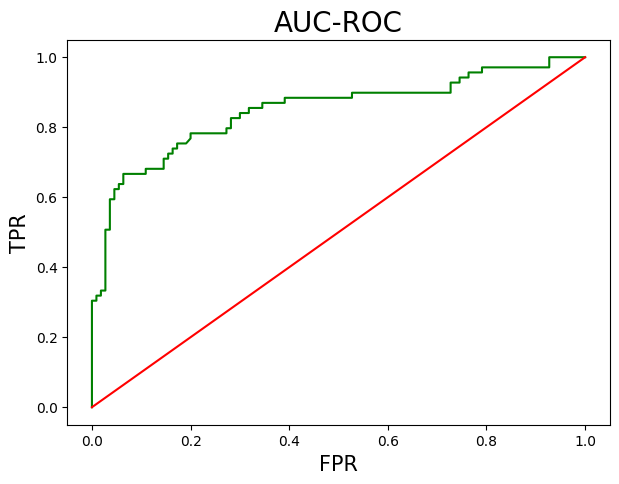

0.8484189723320158

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(Y_test,predicted_probabilities[:,1])